In [211]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer, normalize, StandardScaler, PolynomialFeatures, MinMaxScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV

from tensorflow import keras

from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE = 7

In [3]:
df_full = pd.read_csv('data/__train__.csv')

In [4]:
df_full

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,...,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
0,1310,2019,1,79.263,129.077355,12,0,320.0,222.330633,52.239128,...,0.757000,0.760333,0.69800,0.66100,0.601000,0.538000,0.4710,0.402333,0.347375,0.343000
1,1315,2018,1,115.484,190.068235,12,0,360.0,202.932162,34.790209,...,0.734968,0.734000,0.73625,0.71400,0.683000,0.624429,0.5905,0.511000,0.463333,0.410000
2,1315,2019,1,83.883,149.674818,12,0,320.0,229.686158,66.645135,...,0.693000,0.664300,0.66600,0.62300,0.578000,0.508000,0.4380,0.366667,0.333125,0.325000
3,1312,2018,1,55.964,181.336145,12,0,360.0,209.345544,49.952827,...,0.751783,0.737000,0.73500,0.70950,0.680750,0.646286,0.6115,0.540000,0.476000,0.405000
4,1312,2019,1,55.965,148.165017,12,0,320.0,204.983972,51.916963,...,0.735000,0.715300,0.67900,0.66500,0.630000,0.569000,0.5010,0.460714,0.399500,0.387000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,292,2017,6,67.750,44.508800,19,3,310.0,198.125290,59.763690,...,0.645000,0.591000,0.50400,0.41925,0.363286,0.333143,0.3340,0.341500,0.346000,0.341000
5730,291,2017,6,34.610,49.282400,19,3,320.0,199.936302,60.102427,...,0.670000,0.595000,0.53500,0.37160,0.357000,0.334714,0.3190,0.296000,0.299000,0.298000
5731,300,2017,6,30.340,48.486800,19,3,310.0,198.791777,60.479071,...,0.667000,0.645000,0.59600,0.50780,0.467500,0.427333,0.4200,0.387833,0.372667,0.370000
5732,293,2017,6,43.850,35.180000,19,3,400.0,238.239117,61.015268,...,0.675000,0.598000,0.50600,0.34200,0.298000,0.271286,0.2735,0.251000,0.243333,0.233000


In [5]:
df_full.columns.tolist()

['Field',
 'Year',
 'Cluster',
 'Area',
 'Yield',
 'Geozone',
 'Predecessor',
 'FAO',
 'N_kg/ga',
 'P_kg/ga',
 'K_kg/ga',
 '5_YEARLY_median_AVERAGE_TEMPERATURE',
 '6_YEARLY_median_AVERAGE_TEMPERATURE',
 '7_YEARLY_median_AVERAGE_TEMPERATURE',
 '8_YEARLY_median_AVERAGE_TEMPERATURE',
 '9_YEARLY_median_AVERAGE_TEMPERATURE',
 '5_YEARLY_median_EVAPORATION',
 '6_YEARLY_median_EVAPORATION',
 '7_YEARLY_median_EVAPORATION',
 '8_YEARLY_median_EVAPORATION',
 '9_YEARLY_median_EVAPORATION',
 '5_YEARLY_median_HUMIDITY(%)',
 '6_YEARLY_median_HUMIDITY(%)',
 '7_YEARLY_median_HUMIDITY(%)',
 '8_YEARLY_median_HUMIDITY(%)',
 '9_YEARLY_median_HUMIDITY(%)',
 '5_YEARLY_sum_CALCULATED_RADIATION',
 '6_YEARLY_sum_CALCULATED_RADIATION',
 '7_YEARLY_sum_CALCULATED_RADIATION',
 '8_YEARLY_sum_CALCULATED_RADIATION',
 '9_YEARLY_sum_CALCULATED_RADIATION',
 '5_YEARLY_sum_RAINFALL',
 '6_YEARLY_sum_RAINFALL',
 '7_YEARLY_sum_RAINFALL',
 '8_YEARLY_sum_RAINFALL',
 '9_YEARLY_sum_RAINFALL',
 '22_WEEK_AVERAGE_TEMPERATURE',
 '23_W

In [6]:
df_full.iloc[:, :100].info() # info is displayed for a maximum of 100 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 100 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Field                                5734 non-null   int64  
 1   Year                                 5734 non-null   int64  
 2   Cluster                              5734 non-null   int64  
 3   Area                                 5734 non-null   float64
 4   Yield                                5734 non-null   float64
 5   Geozone                              5734 non-null   int64  
 6   Predecessor                          5734 non-null   int64  
 7   FAO                                  4944 non-null   float64
 8   N_kg/ga                              5734 non-null   float64
 9   P_kg/ga                              5507 non-null   float64
 10  K_kg/ga                              5399 non-null   float64
 11  5_YEARLY_median_AVERAGE_TEMPE

In [7]:
# Take some features
df = df_full.iloc[:, 0:11]
df.columns

Index(['Field', 'Year', 'Cluster', 'Area', 'Yield', 'Geozone', 'Predecessor',
       'FAO', 'N_kg/ga', 'P_kg/ga', 'K_kg/ga'],
      dtype='object')

In [8]:
df.describe()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga
count,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,4944.000000,5734.000000,5507.000000,5399.000000
mean,2188.267876,2017.923439,1.878793,101.293789,121.298482,20.457272,1.330136,320.234628,204.087681,50.697707,48.140306
std,1253.503357,1.022969,2.135754,67.477730,35.041352,12.125780,1.295516,40.091762,33.014385,10.007667,29.424117
min,0.000000,2016.000000,0.000000,30.020000,3.402800,0.000000,0.000000,180.000000,98.309597,13.425600,-97.590938
25%,1097.250000,2017.000000,0.000000,55.151500,99.406529,9.250000,0.000000,290.000000,183.645416,45.557459,34.342303
50%,2182.000000,2018.000000,1.000000,86.260000,123.748036,21.000000,1.000000,320.000000,208.578230,50.942189,50.283063
75%,3389.000000,2019.000000,4.000000,123.433000,146.514301,30.000000,2.000000,360.000000,226.068116,55.788349,63.568903
max,4180.000000,2019.000000,6.000000,730.410000,190.384400,41.000000,4.000000,440.000000,279.622584,145.148830,197.059103


# Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Field        5734 non-null   int64  
 1   Year         5734 non-null   int64  
 2   Cluster      5734 non-null   int64  
 3   Area         5734 non-null   float64
 4   Yield        5734 non-null   float64
 5   Geozone      5734 non-null   int64  
 6   Predecessor  5734 non-null   int64  
 7   FAO          4944 non-null   float64
 8   N_kg/ga      5734 non-null   float64
 9   P_kg/ga      5507 non-null   float64
 10  K_kg/ga      5399 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 492.9 KB


In [10]:
df_test = df.dropna(axis=0, how='any')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4647 entries, 0 to 5733
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Field        4647 non-null   int64  
 1   Year         4647 non-null   int64  
 2   Cluster      4647 non-null   int64  
 3   Area         4647 non-null   float64
 4   Yield        4647 non-null   float64
 5   Geozone      4647 non-null   int64  
 6   Predecessor  4647 non-null   int64  
 7   FAO          4647 non-null   float64
 8   N_kg/ga      4647 non-null   float64
 9   P_kg/ga      4647 non-null   float64
 10  K_kg/ga      4647 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 435.7 KB


#### *A lot of data is lost, will try to replace missing values for fertilizers with zeros*

In [11]:
df[['N_kg/ga', 'P_kg/ga', 'K_kg/ga']] = df[['N_kg/ga', 'P_kg/ga', 'K_kg/ga']].fillna(0, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Field        5734 non-null   int64  
 1   Year         5734 non-null   int64  
 2   Cluster      5734 non-null   int64  
 3   Area         5734 non-null   float64
 4   Yield        5734 non-null   float64
 5   Geozone      5734 non-null   int64  
 6   Predecessor  5734 non-null   int64  
 7   FAO          4944 non-null   float64
 8   N_kg/ga      5734 non-null   float64
 9   P_kg/ga      5734 non-null   float64
 10  K_kg/ga      5734 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 492.9 KB


In [12]:
df.dropna(axis=0, how='any', inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5733
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Field        4944 non-null   int64  
 1   Year         4944 non-null   int64  
 2   Cluster      4944 non-null   int64  
 3   Area         4944 non-null   float64
 4   Yield        4944 non-null   float64
 5   Geozone      4944 non-null   int64  
 6   Predecessor  4944 non-null   int64  
 7   FAO          4944 non-null   float64
 8   N_kg/ga      4944 non-null   float64
 9   P_kg/ga      4944 non-null   float64
 10  K_kg/ga      4944 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 463.5 KB


In [13]:
# Do the same steps with the full data
df_full[['N_kg/ga', 'P_kg/ga', 'K_kg/ga']] = df_full[['N_kg/ga', 'P_kg/ga', 'K_kg/ga']].fillna(0, axis=1)
df_full.dropna(axis=0, how='any', inplace=True)
df_full.iloc[:, 0:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5733
Data columns (total 100 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Field                                4944 non-null   int64  
 1   Year                                 4944 non-null   int64  
 2   Cluster                              4944 non-null   int64  
 3   Area                                 4944 non-null   float64
 4   Yield                                4944 non-null   float64
 5   Geozone                              4944 non-null   int64  
 6   Predecessor                          4944 non-null   int64  
 7   FAO                                  4944 non-null   float64
 8   N_kg/ga                              4944 non-null   float64
 9   P_kg/ga                              4944 non-null   float64
 10  K_kg/ga                              4944 non-null   float64
 11  5_YEARLY_median_AVERAGE_TEMPE

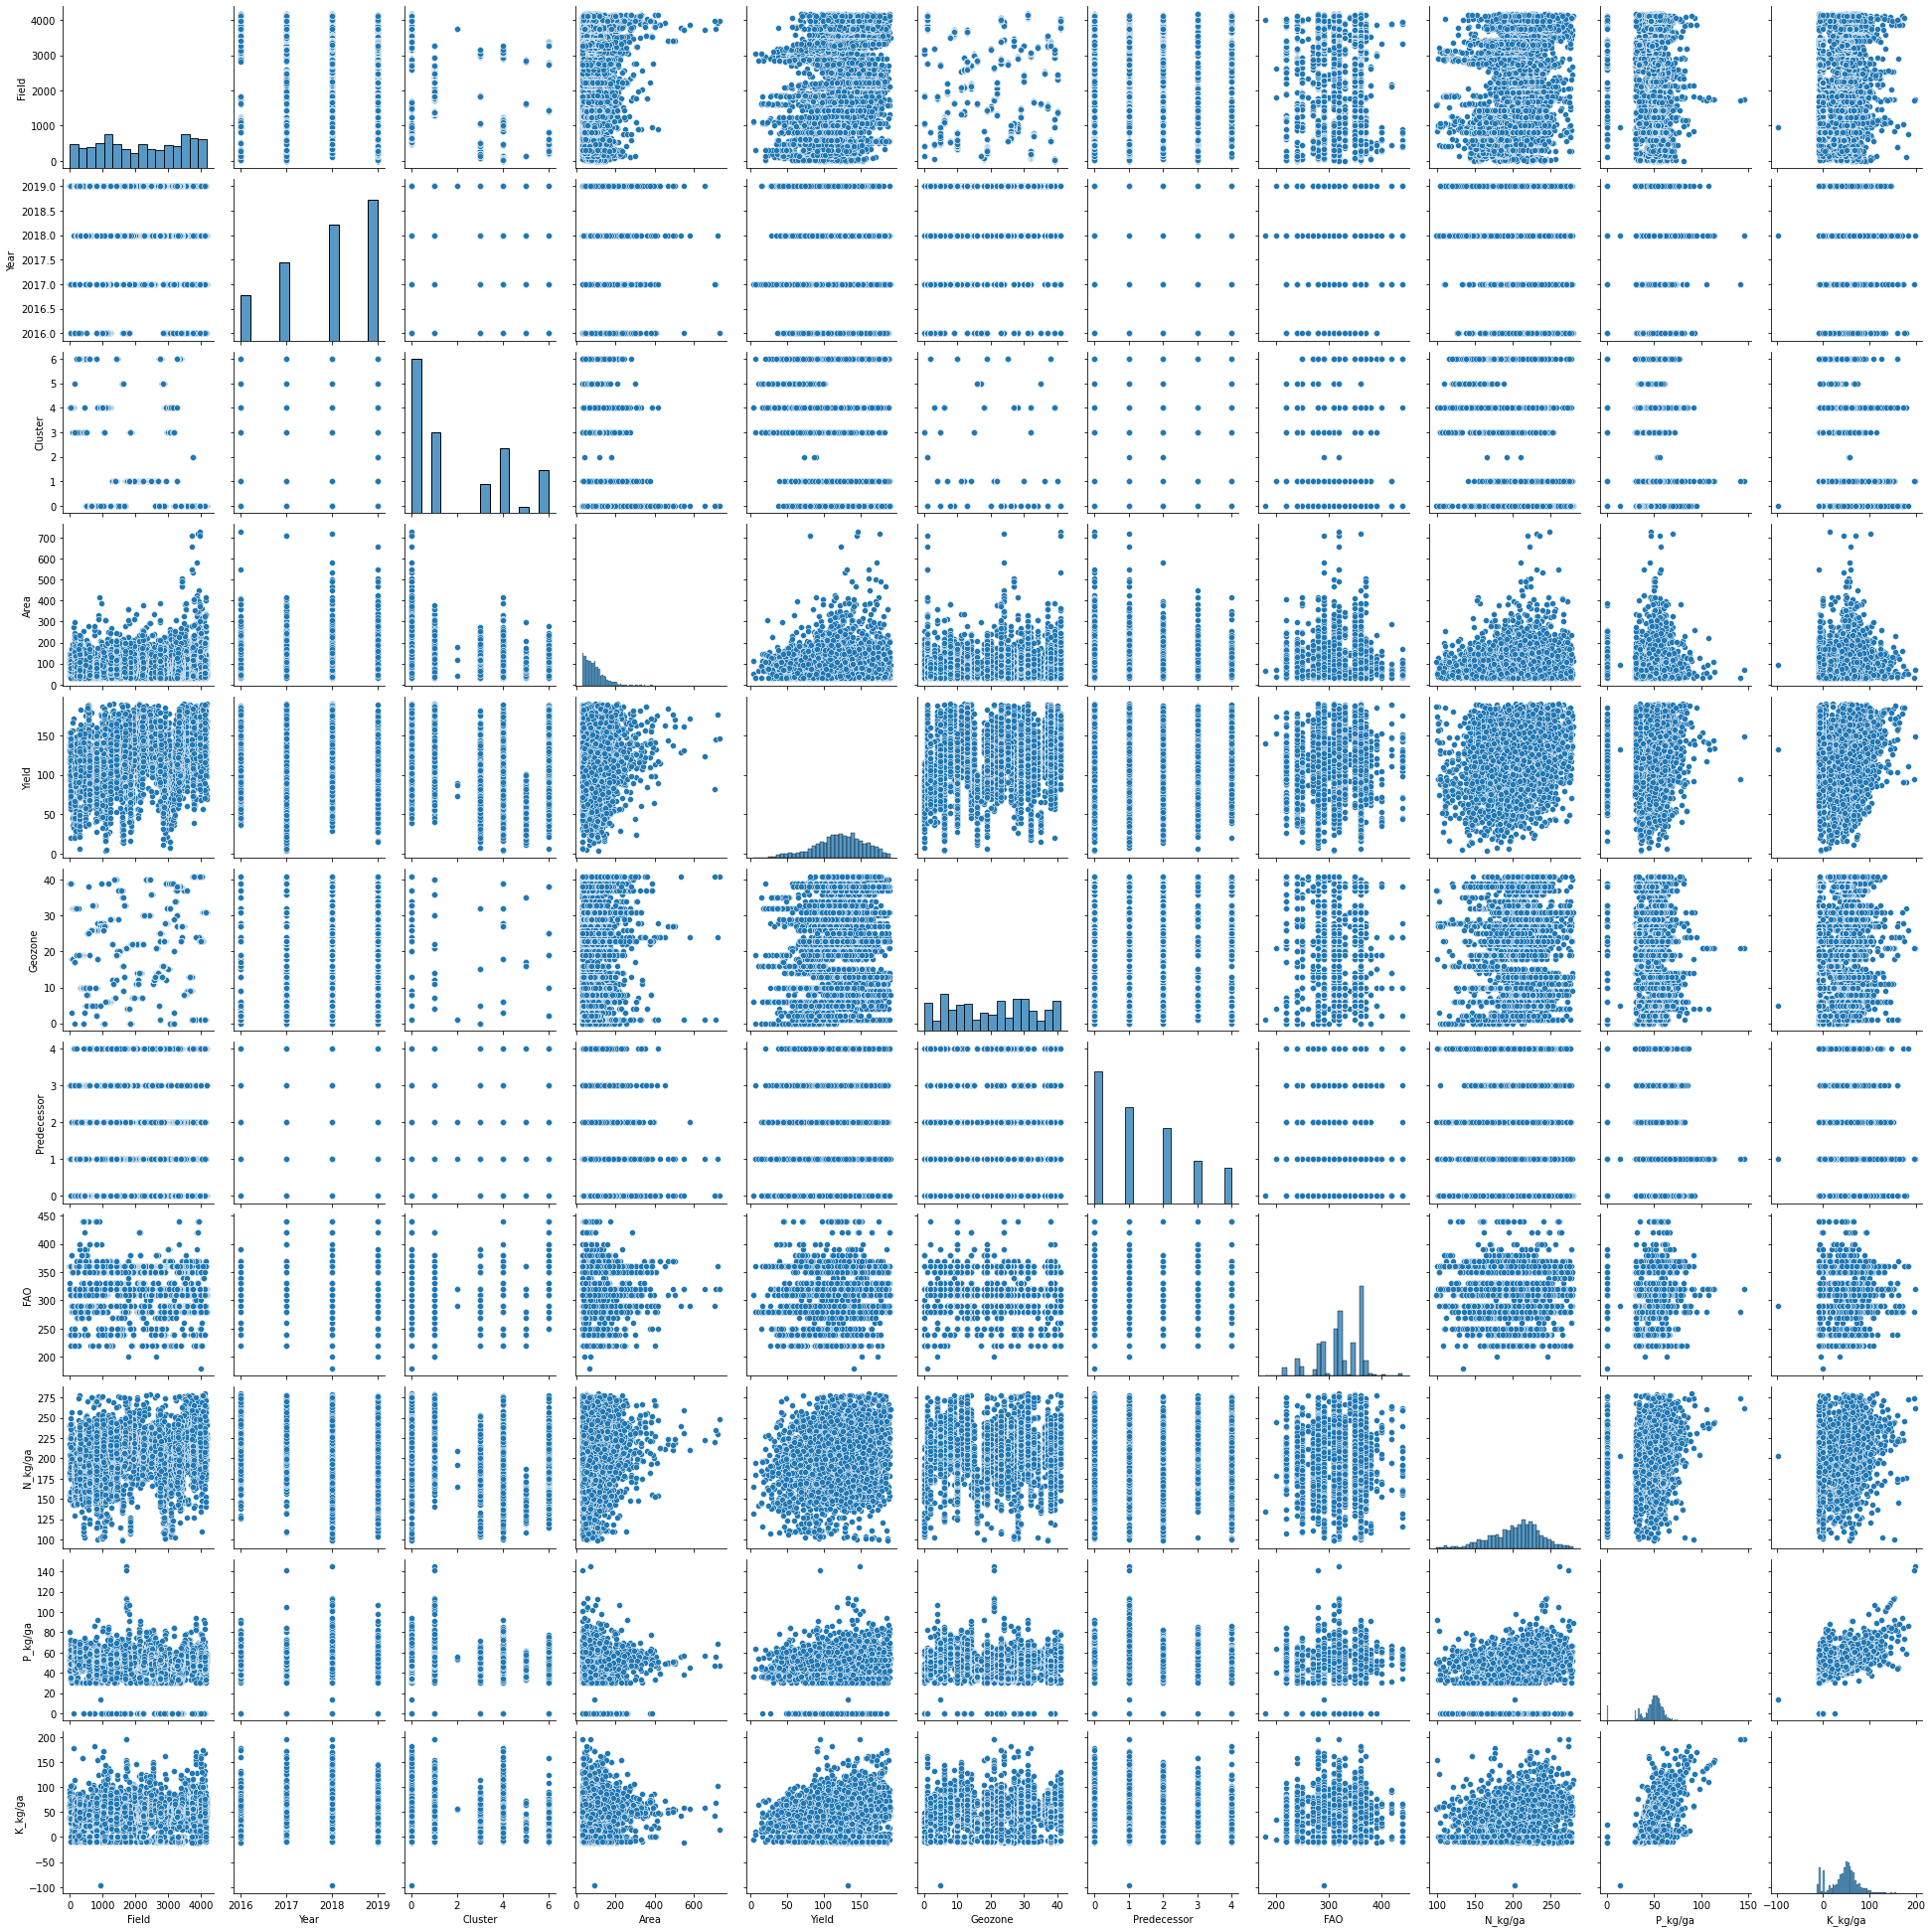

In [14]:
sns.pairplot(df)

#### *The main characteristics have abnormal distribution and outliers*
#### *for fertilizers replace negative values with zeros*

In [15]:
# loop for print only :)

features = ['N_kg/ga', 'P_kg/ga', 'K_kg/ga']

for f in features:
    print(f"Negative {f}: {len(df[df[f] < 0])}")
    df.mask(df[f] < 0, 0, inplace=True)
    df_full.mask(df_full[f] < 0, 0, inplace=True)



Negative N_kg/ga: 0
Negative P_kg/ga: 0
Negative K_kg/ga: 482


In [16]:
%%time
X_embedded = TSNE(n_components=2, random_state=RANDOM_STATE).fit_transform(
    df_full.drop(['Year', 'Yield', 'Cluster'], axis=1))
X_embedded.shape

CPU times: user 1min 51s, sys: 1.77 s, total: 1min 53s
Wall time: 15.2 s


(4944, 2)

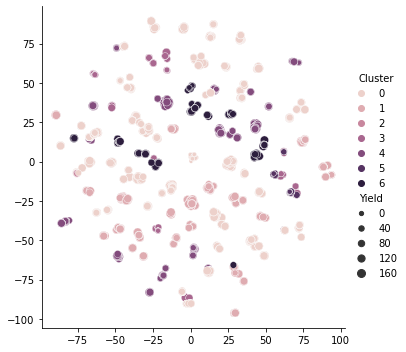

In [17]:
sns.relplot(x=X_embedded[:, 0], y=X_embedded[:, 1], size=df_full['Yield'], hue=df_full['Cluster'])

# Base model

In [18]:
# Split data

X_bm = df.drop(['Year', 'Yield'], axis=1)
y_bm = df['Yield']
X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(X_bm,
                                                                y_bm,
                                                                train_size=0.8,
                                                                random_state=RANDOM_STATE)
print(f"Train: {len(X_train_bm)}")
print(f"Test: {len(X_test_bm)}")

Train: 3955
Test: 989


In [19]:
%%time

# Model training
linear_base_model = LinearRegression().fit(X_train_bm, y_train_bm)

y_pred_dm = linear_base_model.predict(X_test_bm)
print(f"Linear regression score: {linear_base_model.score(X_test_bm, y_test_bm)}")
print(f"Mean absolute error: {mean_absolute_error(y_test_bm, y_pred_dm)}")
print(f"Mean squared error: {mean_squared_error(y_test_bm, y_pred_dm)}")

Linear regression score: 0.6423873022414823
Mean absolute error: 22.482572821195326
Mean squared error: 833.5054744655885
CPU times: user 11 ms, sys: 1.84 ms, total: 12.8 ms
Wall time: 7.46 ms


#### *We see that the absolute error is large enough, it is about one quantile*
#### *Will try to train a model with full data*

In [20]:
# Split the full data

X_full_bm = df_full.drop(['Year', 'Yield'], axis=1)
y_full_bm = df_full['Yield']
X_train_full_bm, X_test_full_bm, y_train_full_bm, y_test_full_bm = train_test_split(X_full_bm,
                                                                                y_full_bm,
                                                                                train_size=0.8,
                                                                                random_state=RANDOM_STATE)
print(f"Train: {len(X_train_bm)}")
print(f"Test: {len(X_test_bm)}")

Train: 3955
Test: 989


In [21]:
%%time

# Model training
linear_full_base_model = LinearRegression().fit(X_train_full_bm, y_train_full_bm)

y_pred_full_dm = linear_full_base_model.predict(X_test_full_bm)
print(f"Linear regression score: {linear_full_base_model.score(X_test_full_bm, y_test_full_bm)}")
print(f"Mean absolute error: {mean_absolute_error(y_test_full_bm, y_pred_full_dm)}")
print(f"Mean squared error: {mean_squared_error(y_test_full_bm, y_pred_full_dm)}")

Linear regression score: 0.8840896519715767
Mean absolute error: 11.902023802679496
Mean squared error: 270.15793967735675
CPU times: user 276 ms, sys: 18.4 ms, total: 294 ms
Wall time: 59.4 ms


#### *All metrics from the full data is much better*

# Feature engineering

In [232]:
# Split the full data
X = df_full.drop(['Year', 'Yield'], axis=1)
y = df_full['Yield']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=RANDOM_STATE)
print(f"Train: {len(X_train_bm)}")
print(f"Test: {len(X_test_bm)}")

Train: 3955
Test: 989


#### Delete outliers

In [169]:
%%time

# Replace outliers with mean values
i = 0

def outliers_to_mean(arr):
    global i
    outliers = LocalOutlierFactor(n_neighbors=20).fit_predict(arr.to_numpy().reshape((-1, 1)))
    print(f"({i}) Numbers of outliers: {len(arr[outliers < 0])}")
    arr[outliers == -1] = arr.mean()
    i += 1
    return arr

X_train = X_train.apply(outliers_to_mean, axis=0)
# Makes the result worse

(0) Numbers of outliers: 41
(1) Numbers of outliers: 3
(2) Numbers of outliers: 21
(3) Numbers of outliers: 32
(4) Numbers of outliers: 0
(5) Numbers of outliers: 57
(6) Numbers of outliers: 20
(7) Numbers of outliers: 30
(8) Numbers of outliers: 18
(9) Numbers of outliers: 146
(10) Numbers of outliers: 156
(11) Numbers of outliers: 146
(12) Numbers of outliers: 121
(13) Numbers of outliers: 106
(14) Numbers of outliers: 117
(15) Numbers of outliers: 155
(16) Numbers of outliers: 99
(17) Numbers of outliers: 120
(18) Numbers of outliers: 59
(19) Numbers of outliers: 21
(20) Numbers of outliers: 3
(21) Numbers of outliers: 12
(22) Numbers of outliers: 10
(23) Numbers of outliers: 30
(24) Numbers of outliers: 146
(25) Numbers of outliers: 146
(26) Numbers of outliers: 146
(27) Numbers of outliers: 146
(28) Numbers of outliers: 61
(29) Numbers of outliers: 129
(30) Numbers of outliers: 91
(31) Numbers of outliers: 91
(32) Numbers of outliers: 121
(33) Numbers of outliers: 122
(34) Numbers

#### Scalers

In [92]:
#  Normalize
X_train = normalize(X_train, axis=0)
X_test = normalize(X_test, axis=0)

# Makes the result worse

In [95]:
# MinMaxScaler
mm_scaler = MinMaxScaler().fit(X_train)
X_train = mm_scaler.transform(X_train)
X_test = mm_scaler.transform(X_test)

# Did not help

In [230]:
# QuantileTransformer
q_transformer = QuantileTransformer().fit(X_train)
X_train = q_transformer.transform(X_train)
X_test = q_transformer.transform(X_test)

# The results improved slightly

#### Features

In [98]:
# Polynomial features
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
# Makes the result worse

# Models

#### Linear regression

In [164]:
%%time

# Model training
lr = LinearRegression().fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(f"Linear regression score: {lr.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_lr)}")

Linear regression score: 0.8874211110963262
Mean absolute error: 11.749924666204059
Mean squared error: 262.39314431119203
CPU times: user 247 ms, sys: 23.1 ms, total: 271 ms
Wall time: 64.9 ms


#### Lasso

In [118]:
%%time

# Model training
lasso = Lasso(alpha=1.0).fit(X_train, y_train)

y_pred_ls = lasso.predict(X_test)
print(f"Linear regression score: {lasso.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred_ls)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_ls)}")

Linear regression score: 0.846771918208551
Mean absolute error: 14.801790510225919
Mean squared error: 357.13621416562734
CPU times: user 346 ms, sys: 37.2 ms, total: 383 ms
Wall time: 74.3 ms


#### NN

In [149]:
nn_model = keras.Sequential()
nn_model.add(keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )))
nn_model.add(keras.layers.Dense(128, activation='relu'))
nn_model.add(keras.layers.Dense(64, activation='relu'))
nn_model.add(keras.layers.Dense(1))


nn_model.compile(loss='mean_squared_error',
                 optimizer='rmsprop',
                 metrics=['mean_absolute_error', 'mean_squared_error'])

nn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               20608     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 45,441
Trainable params: 45,441
Non-trainable params: 0
_________________________________________________________________


In [150]:
nn_history = nn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_train, y_train))

Epoch 1/10
31/31 [==============================] - 1s 8ms/step - loss: 8932.6671 - mean_absolute_error: 78.8858 - mean_squared_error: 8932.6671 - val_loss: 982.5596 - val_mean_absolute_error: 24.2210 - val_mean_squared_error: 982.5596
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 817.3174 - mean_absolute_error: 21.7890 - mean_squared_error: 817.3174 - val_loss: 578.1302 - val_mean_absolute_error: 18.0195 - val_mean_squared_error: 578.1302
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 529.4865 - mean_absolute_error: 17.5271 - mean_squared_error: 529.4865 - val_loss: 575.0994 - val_mean_absolute_error: 18.0692 - val_mean_squared_error: 575.0994
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 466.2672 - mean_absolute_error: 16.5111 - mean_squared_error: 466.2672 - val_loss: 419.4001 - val_mean_absolute_error: 15.5703 - val_mean_squared_error: 419.4001
Epoch 5/10
31/31 [==============================] - 0s 3ms/ste

In [135]:
nn_history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [151]:
nn_history.history['val_mean_absolute_error']

[24.220972061157227,
 18.019542694091797,
 18.069171905517578,
 15.57032585144043,
 17.681421279907227,
 15.139379501342773,
 14.695347785949707,
 19.037090301513672,
 14.650726318359375,
 14.052629470825195]

#### XGBoost

In [196]:
%%time
xgb_model = XGBRegressor(n_estimators=1000).fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print(f"Linear regression score: {xgb_model.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_xgb)}")

Linear regression score: 0.9137124365298059
Mean absolute error: 10.119284942515046
Mean squared error: 201.1146611445809
CPU times: user 1min 21s, sys: 321 ms, total: 1min 21s
Wall time: 10.8 s


#### * XGBoost gives the best result *
#### * Use Grid Search to find the best hyperparameters *

In [197]:
%%time

parameters = {'n_estimators':[1000],
              'max_depth':[3, 5, 7, 9, 12],
              'learning_rate':[0.3, 0.1, 0.01],
              'colsample_bytree':[0.5, 0.7, 1.0]}
xgb_base_model = XGBRegressor()

GS = GridSearchCV(xgb_base_model, parameters, cv=3, n_jobs=-1)
GS.fit(X_train, y_train)

CPU times: user 45.5 s, sys: 405 ms, total: 45.9 s
Wall time: 18min 7s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [199]:
best_xgb_model = GS.best_estimator_
GS.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 1000}

In [203]:
y_pred__best_xgb = best_xgb_model.predict(X_test)
print(f"Linear regression score: {best_xgb_model.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred__best_xgb)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred__best_xgb)}")

Linear regression score: 0.9162844635898129
Mean absolute error: 9.796250402951618
Mean squared error: 195.11991138198417


In [235]:
# XGBRegressor with data without quantile transform

best_xgb_model_rd = XGBRegressor(**GS.best_params_).fit(X_train, y_train)

y_pred__best_xgb_rd = best_xgb_model_rd.predict(X_test)
print(f"Linear regression score: {best_xgb_model_rd.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred__best_xgb_rd)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred__best_xgb_rd)}")

Linear regression score: 0.9170925351717744
Mean absolute error: 9.69239673985687
Mean squared error: 193.23649926729524


#### * Best mean absolute arror = 9.69 *

# Feature importance

In [324]:
# Create a dataframe with features and their importance
feature_importances = pd.DataFrame({
                                    'column':X_train.columns, 
                                    'importance':best_xgb_model_rd.feature_importances_})
feature_importances

,column,importance
0,Field,0.000326
1,Cluster,0.000692
2,Area,0.000198
3,Geozone,0.000409
4,Predecessor,0.000476
...,...,...
155,35_week_ndvi,0.000652
156,36_week_ndvi,0.000348
157,37_week_ndvi,0.000412
158,38_week_ndvi,0.000305


In [325]:
# Select top important features
top_feature = feature_importances.nlargest(20, 'importance', keep='all')
top_feature

,column,importance
99,33_WEEK_HUMIDITY(%),0.424722
95,29_WEEK_HUMIDITY(%),0.189043
98,32_WEEK_HUMIDITY(%),0.096557
140,38_WEEK_SUM_ACTIVE_TEMPERATURE,0.029601
78,30_WEEK_EVAPORATION,0.028868
45,33_WEEK_AVERAGE_TEMPERATURE,0.022454
153,33_week_ndvi,0.017855
120,36_WEEK_RAINFALL,0.012049
126,24_WEEK_SUM_ACTIVE_TEMPERATURE,0.007477
55,25_WEEK_CALCULATED_RADIATION,0.006395


<AxesSubplot:xlabel='importance', ylabel='column'>

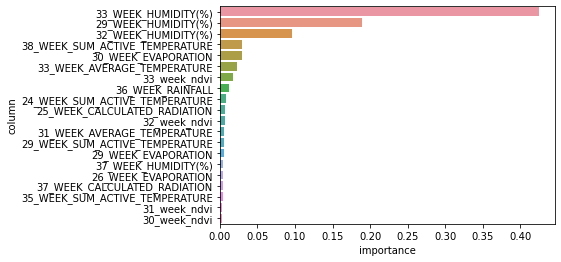

In [326]:
sns.barplot(x=top_feature['importance'], y=top_feature['column'])

#### *Humidity, active temperature, evaporation, ndvi, rainfall are the most important features*

# Weighted average forecast and confidence interval

In [331]:
X_test

,Field,Cluster,Area,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,...,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
1125,1759,1,137.572,4,3,310.0,221.095302,49.624240,37.082691,14.783217,...,0.764000,0.759000,0.7525,0.7380,0.729800,0.684500,0.638125,0.605000,0.475000,0.372
1441,0,0,0.000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
3500,3577,0,43.626,9,2,320.0,183.627286,59.042314,63.809196,15.810000,...,0.674625,0.639333,0.5728,0.4325,0.374000,0.360000,0.309000,0.290333,0.275333,0.252
4546,2770,0,114.056,23,0,320.0,187.401557,51.533703,58.217016,15.758870,...,0.725286,0.715000,0.7015,0.6610,0.531000,0.388667,0.307000,0.281000,0.257875,0.221
3060,4082,0,131.210,31,0,360.0,235.556288,61.902523,92.131240,15.815028,...,0.782000,0.773000,0.7200,0.6965,0.689143,0.682857,0.677000,0.623500,0.521000,0.518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,2324,1,64.430,30,0,360.0,239.707005,47.710663,40.974242,15.351338,...,0.773000,0.748000,0.7540,0.7434,0.737500,0.711571,0.702000,0.667000,0.642889,0.607
1499,1055,3,93.850,0,2,320.0,109.843367,0.000000,0.000000,16.201776,...,0.673000,0.619500,0.4770,0.3700,0.301000,0.288250,0.258000,0.262000,0.256571,0.219
4568,4006,0,105.680,1,0,290.0,233.288569,56.039364,75.844058,15.760712,...,0.761000,0.759000,0.7430,0.7230,0.720538,0.710000,0.684000,0.656000,0.608500,0.593
2940,4094,0,72.140,31,0,340.0,268.094927,56.994732,67.127807,15.899978,...,0.755000,0.748000,0.7310,0.7160,0.681000,0.621800,0.535000,0.460250,0.416500,0.358


In [371]:
X_test['Cluster'].value_counts()

0    487
1    189
4    127
6     90
3     77
5     19
Name: Cluster, dtype: int64

In [384]:
def confidence_interval(y, y_pred):
    n = len(y)
    # standard deviation
    std = np.sqrt(np.sum(np.square(y - y_pred)) / n)
    margin_error = 1.96 * (std / np.sqrt(n))
    
    y_min = y_pred - margin_error
    y_max = y_pred + margin_error
    
    return (y_min, y_max)

In [385]:
def weighted_avg_forecast_of_cluster(estimator, df):
    y_pred = estimator.predict(df_cluster)
    
    area_y_sum = sum(df_cluster['Area'] * y_pred)
    area_sum = df_cluster['Area'].sum()
    
    res = area_y_sum / area_sum
    
    return res

In [392]:
# Weighted average forecast and confidence interval
for cluster_index in X_test['Cluster'].unique():
    mask = X_test['Cluster'] == cluster_index
    df_cluster = X_test[mask]
    avg_pred = weighted_avg_forecast_of_cluster(best_xgb_model_rd, df_cluster)
    conf_int = confidence_interval(y_test[mask], avg_pred)
    print(f"Avg predict for cluster {cluster_index}: {avg_pred} {conf_int}")

Avg predict for cluster 1: 139.57033698676992 (135.3138774773862, 143.82679649615363)
Avg predict for cluster 0: 132.16493399301592 (126.50766839641437, 137.82219958961747)
Avg predict for cluster 3: 92.59811282936734 (85.25117014733561, 99.94505551139906)
Avg predict for cluster 5: 55.18620671085693 (45.47279716258006, 64.8996162591338)
Avg predict for cluster 6: 110.85209641184039 (104.05956898954614, 117.64462383413465)
Avg predict for cluster 4: 106.3064390776614 (100.51909755802355, 112.09378059729924)
